In [3]:
import numpy as np
import pandas as pd

songs=pd.read_csv('data/tracks.csv')
songs=songs.head(25000)

In [4]:
songs_for_dec_trees = songs.copy() 
songs_for_dec_trees.set_index('id',inplace=True)

In [5]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)
to_be_deleted = ['id_artists', 'release_date','artists','name'] 

In [6]:
songs_for_dec_trees['release_date'] = pd.to_datetime(songs_for_dec_trees['release_date'], errors='coerce')
songs_for_dec_trees['year'] = pd.DatetimeIndex(songs_for_dec_trees['release_date']).year
songs_for_dec_trees['month'] = pd.DatetimeIndex(songs_for_dec_trees['release_date']).month

AttributeError: module 'numpy' has no attribute 'matrix'

In [ ]:
drop_columns(songs_for_dec_trees,to_be_deleted)#delete columns

In [ ]:
from sklearn import preprocessing

def scale_whole_df_except_valence():
    valence_only = songs_for_dec_trees['valence']
    del songs_for_dec_trees["valence"]

    x = songs_for_dec_trees #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    songs_for_dec_trees[songs_for_dec_trees.columns] = min_max_scaler.fit_transform(songs_for_dec_trees[songs_for_dec_trees.columns].to_numpy())
    songs_for_dec_trees['valence'] = valence_only
scale_whole_df_except_valence()

In [ ]:
songs_for_dec_trees["key"] = songs_for_dec_trees["key"].astype("category")
songs_for_dec_trees = pd.get_dummies(songs_for_dec_trees, columns=["key"])
songs_for_dec_trees.head()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,6,0,0.645,0.4450,-13.338,1,0.4510,0.674,0.7440,0.151,...,0,0,0,0,0,0,0,0,0,0
021ht4sdgPcrDgSk7JTbKY,0,0,0.695,0.2630,-22.136,1,0.9570,0.797,0.0000,0.148,...,0,0,0,0,0,0,0,0,0,0
07A5yehtSnoedViJAZkNnc,0,0,0.434,0.1770,-21.180,1,0.0512,0.994,0.0218,0.212,...,0,0,0,0,0,0,0,0,0,0
08FmqUhxtyLTn6pAh6bk45,0,0,0.321,0.0946,-27.961,1,0.0504,0.995,0.9180,0.104,...,0,0,0,0,0,1,0,0,0,0
08y9GfoqCWfOGsKdwojr5e,0,0,0.402,0.1580,-16.900,0,0.0390,0.989,0.1300,0.311,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
songs_for_dec_trees.dropna(inplace=True)

In [ ]:
starting_key = 0 
for i in range (16, 28):
    songs_for_dec_trees = songs_for_dec_trees.rename(columns={songs_for_dec_trees.columns[i]: 'key_%d' % starting_key})
    starting_key = starting_key  + 1 

In [ ]:
x = songs_for_dec_trees['valence']
del songs_for_dec_trees["valence"]
songs_for_dec_trees['valence'] = x

# IT BEGINS

In [ ]:
import numpy as np
labels = np.array(songs_for_dec_trees['valence'])
features= songs_for_dec_trees.drop('valence', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

In [ ]:
# rf_random.fit(train_features, train_labels)

In [ ]:
# rf_random.best_params_


GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [60],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [1500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [60],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [1500]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=60, min_samples_leaf=2, n_estimators=1500)

In [ ]:

final_model = grid_search.best_estimator_



EVALUATE

In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate(model,test_features,test_labels):
    pred_labels = model.predict(test_features)
    errors = abs(pred_labels-test_labels)
    mape  = 100*np.mean(errors/test_labels)
    accuracy = 100 - mape 
    print('mean_absolute_errorrrrr',mean_absolute_error(test_labels, pred_labels))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
grid_final_accuracy = evaluate(final_model, test_features, test_labels)



mean_absolute_errorrrrr 0.1302945995492641
Model Performance
Average Error: 0.1303 degrees.
Accuracy = -inf%.


C:\Users\3E30~1\AppData\Local\Temp/ipykernel_18700/2364971662.py:5: RuntimeWarning: divide by zero encountered in true_divide
  mape  = 100*np.mean(errors/test_labels)


In [ ]:
best_random = rf_random.best_estimator_
accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
rf_random.best_estimator_.feature_importances_

In [ ]:
features = songs_for_dec_trees.columns
features=features.tolist()
features.remove('valence')

importances = final_model.feature_importances_
indices = np.argsort(importances)

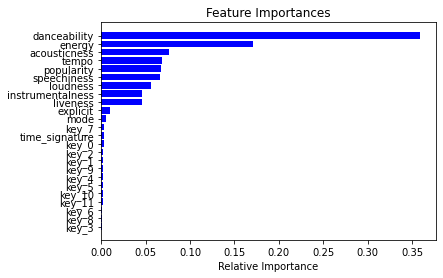

In [ ]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()